#### Challenge Set 5 

**Topic:** Classification    
**Date:** 24 October 2016  
**Name:** Ron Olshansky-Lucero  

In [655]:
# Python 2/3 compatibility
from __future__ import print_function, division

#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

#### Exercise 5.1

Load the data, replace y's with 1 and n's with 0.

Now almost every representative has a ?, which represents the absence of a vote. Almost every representative has a ? (so cannot drop all rows).

Instead, replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is  the ratio of others that said YES over (/) the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column).  


In [656]:
datalink = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

In [657]:
votedf = pd.read_csv(datalink, header=None, na_values = "?")

In [658]:
votedf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [659]:
# replace header names
headers = list(votedf.columns)
headers[0] = 'party'
headers[1:] = ['v'+str(header) for header in headers[1:]]

In [660]:
votedf.columns = headers
votedf.head()

,party,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [661]:
# recode values (y = 1, n = 0), row-wise
votedf[votedf == 'y'] = 1
votedf[votedf == 'n'] = 0
votedf.head()

,party,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [662]:
# split the data into target and features
vote_target = votedf.iloc[:,0]
vote_target.head()

0    republican
1    republican
2      democrat
3      democrat
4      democrat
Name: party, dtype: object

In [663]:
vote_features = votedf.iloc[:,1:]
vote_features.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [664]:
# column means automatically computed
# when calling .mean() on df
vote_features.mean()

v1     0.442080
v2     0.503876
v3     0.596698
v4     0.417453
v5     0.504762
v6     0.641509
v7     0.567696
v8     0.576190
v9     0.501211
v10    0.504673
v11    0.362319
v12    0.423267
v13    0.509756
v14    0.593301
v15    0.427518
v16    0.812689
dtype: float64

In [665]:
# fillna automatic fills column-wise with column mean
vote_features.fillna(vote_features.mean(), inplace = True).head()

/Users/rol-mbp/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [666]:
vote_target.head()

0    republican
1    republican
2      democrat
3      democrat
4      democrat
Name: party, dtype: object

In [667]:
vote_features.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


#### Exercise 5.2  

Split the data into test and training sets.

Use this function: `from sklearn.cross_validation import train_test_split`

In [668]:
from sklearn.cross_validation import train_test_split
X = vote_features
y = vote_target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 4444)

#### Exercise 5.3  

Using sklearn's KNN algorithm, train a model that predicts the party (republican/democrat):

`from sklearn.neighbors import KNeighborsClassifier`

Try it with a lot of different k values (number of neighbors) from 1 to 20, and on the tset set calculate the accuracy (number of correct predictions / number of all predictions) for each k.

You can use this to calculate accuracy:

`from sklearn.metrics import accuracy_score`  

Which k value gives the highest accuracy?

In [669]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [670]:
# construct list of accuracy scores for every model
# i.e. model with k = 1 .... model with k = 20
k_vals = list(range(1, 21))
scores = []
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    fit = model.fit(X_train, y_train)
    y_pred_vals = fit.predict(X_test)
    score = accuracy_score(y_test, y_pred_vals)
    scores.append(score)

In [671]:
# retrieve k-value for max scores
for idx, score in enumerate(scores):
    k = idx+1 
    if score == max(scores):
        print(k, score)

6 0.931297709924
9 0.931297709924
10 0.931297709924


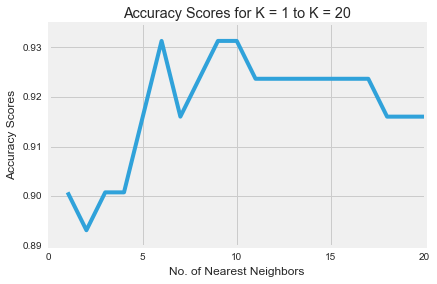

In [672]:
# plot accuracy scores for each k value
plt.plot(k_vals, scores)
plt.ylabel("Accuracy Scores")
plt.xlabel("No. of Nearest Neighbors")
plt.title("Accuracy Scores for K = 1 to K = 20");

Based on the element with the maximum score and plot of Ks and accuracy, we see that K = 6, 9, 10 are the Ks for which the maximum accuracy score is reached.

#### Exercise 5.4  

Make a similar model, but with `LogisticRegression` instead. Calculate test accuracy.  


In [673]:
from sklearn.linear_model import LogisticRegression

In [674]:
lr = LogisticRegression()
lrfit = lr.fit(X_train, y_train)

In [675]:
# check accuracy
y_pred_vals_lr = lrfit.predict(X_test)
accuracy_score(y_test, y_pred_vals_lr)

0.93893129770992367

In [676]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_vals_lr)

array([[75,  2],
       [ 6, 48]])

In [677]:
confusion_matrix(y_test, y_pred_vals_lr)/len(y_test)

array([[ 0.57251908,  0.01526718],
       [ 0.04580153,  0.36641221]])

The model has an accuracy score of around 0.94, and the confusion matrix shows that there were 2 false negatives (miss / type 2 error) and 6 false positives out of a test set size of 131. These correspond to only about 1.5% false negative rate and about 4.6% false positive rate.

#### Exercise 5.5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X (an array or matrix of input examples) and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat', 'democrat', 'democrat'].

Make a `y_predicted` vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [678]:
y.value_counts()

democrat      267
republican    168
Name: party, dtype: int64

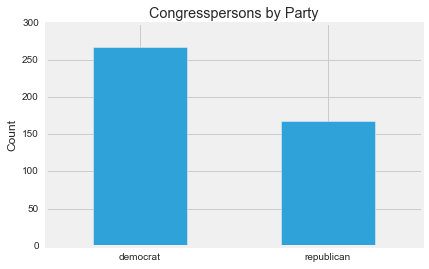

In [679]:
# bar graph
y.value_counts().plot(kind = 'bar', rot = 0)
plt.title("Congresspersons by Party")
plt.ylabel("Count");

In [680]:
# actual proportion of democrats and republicans
counts = y.value_counts().tolist()
print(counts)
print([ct/y.value_counts().sum() for ct in counts])

[267, 168]
[0.61379310344827587, 0.38620689655172413]


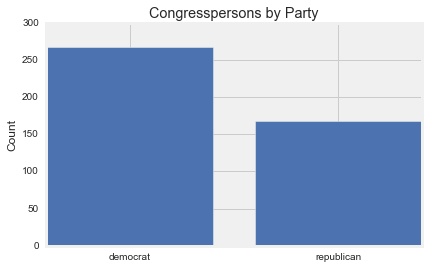

In [681]:
# bar graph (alternative/longer way)
partycode = [0, 1]
partylabel = ['democrat', 'republican']
counts = y.value_counts().tolist()
plt.bar(partycode, counts, align = 'center')
plt.xticks(partycode, partylabel)
plt.title("Congresspersons by Party")
plt.ylabel("Count");

In [682]:
# functions that always return 'democrat' or 'republican'
def predict_dem(X):
    return ['democrat' for d in range(len(X))]
def predict_rep(X):
    return ['republican' for d in range(len(X))]

In [683]:
# test the functions
print(set(predict_dem(X_test)))
print(set(predict_rep(X_test)))

{'democrat'}
{'republican'}


In [684]:
# measure the accuracy of these 'predictions'
y_pred_dem = predict_dem(X_test)
y_pred_rep = predict_rep(X_test)
print(accuracy_score(y_test, y_pred_dem))
print(accuracy_score(y_test, y_pred_rep))

0.587786259542
0.412213740458


There are 267 (61%) democrats and 168 (39%) republicans.

The accuracy of the all-democrat predictions (~59%) is nearly the same as the proportion of democrats in the full dataset (~61%).

Likewise, the accuracy of the all-republican predictions (~41%) is nearly the same as the proportion of republicans in the full dataset (~39%).

#### Exercise 5.6

Plot the accuracies as a function of k.

Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy, and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [685]:
# variables, as previously defined

# KNN
k_vals = list(range(1, 21))
scores # for each k value (5.3 above)

# Logistic (5.4 above)
# same scores for all k in k_vals
log_scores = [accuracy_score(y_test, y_pred_vals_lr)] * len(k_vals)

# Democrat Predictor (5.5 above)
# same scores for all k in k_vals
dem_scores = [accuracy_score(y_test, y_pred_dem)] * len(k_vals)

# Republican Predictor (5.5 above)
# same scores for all k in k_vals
rep_scores = [accuracy_score(y_test, y_pred_rep)] * len(k_vals)

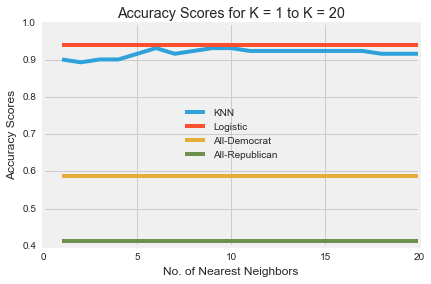

In [686]:
# plot all accuracy scores for each k value
plt.plot(k_vals, scores, label = "KNN")
plt.plot(k_vals, log_scores, label = "Logistic")
plt.plot(k_vals, dem_scores, label = "All-Democrat")
plt.plot(k_vals, rep_scores, label = "All-Republican")
plt.ylabel("Accuracy Scores")
plt.xlabel("No. of Nearest Neighbors")
plt.title("Accuracy Scores for K = 1 to K = 20")
plt.legend(loc = 'center');

#### Exercise 5.7  

Plot a learning curve for the logistic regression model. But instead of going through the painstsaking steps of doing it yourself, use this function:

`from sklearn.learning_curve import learning_curve`

This will give you the m (size of subsample), training errors, and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do cross-validation all by itself.

Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one (training error and test error) for each fold (separate partition) of the cross-validation.

A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. Doing something like:

`train_cv_err = np.mean(train_err, axis = 1)`  
`test_cv_err = np.mean(ts_err, axis = 1)`  

Before plotting `m` vs `train_cv_err` and `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function, the `np.mean(..., axis = 1)` means take the mean along axis 1 (column axis). For each row, you have a bunch of columns, each corresponding to a cross-validation fold, you are averaging these columns for each row.

Draw the learning curve for KNN with the best k value as well.

In [687]:
from sklearn.learning_curve import learning_curve
m, train_err, test_err = learning_curve(LogisticRegression(), X, y,
                                       cv = 10)
train_cv_err = np.mean(train_err, axis = 1)
test_cv_err = np.mean(test_err, axis = 1)

In [688]:
train_cv_err

array([ 0.97179487,  0.97637795,  0.97674419,  0.97359736,  0.97186701])

In [689]:
test_cv_err

array([ 0.9143436 ,  0.93052451,  0.94221031,  0.95817225,  0.95822763])

In [690]:
m # 5 different subsample sizes

array([ 39, 127, 215, 303, 391])

In [691]:
# train errors
# - each row is for 5 different values of m
# - each of the 10 columns corresponds to a single CV fold's error
train_err

array([[ 0.94871795,  0.97435897,  0.97435897,  0.97435897,  0.97435897,
         0.97435897,  0.97435897,  0.97435897,  0.97435897,  0.97435897],
       [ 0.97637795,  0.98425197,  0.96850394,  0.97637795,  0.97637795,
         0.97637795,  0.97637795,  0.97637795,  0.97637795,  0.97637795],
       [ 0.96744186,  0.97209302,  0.97209302,  0.97674419,  0.97209302,
         0.98139535,  0.98139535,  0.98139535,  0.98139535,  0.98139535],
       [ 0.97029703,  0.97689769,  0.97689769,  0.97359736,  0.9669967 ,
         0.98349835,  0.9669967 ,  0.97359736,  0.97359736,  0.97359736],
       [ 0.97186701,  0.97186701,  0.97186701,  0.97186701,  0.96930946,
         0.97953964,  0.96930946,  0.96930946,  0.97186701,  0.97186701]])

In [692]:
# test errors
# - each row is for 5 different values of m
# - each of the 10 columns corresponds to a single CV fold's error
test_err

array([[ 0.97727273,  0.90909091,  0.93181818,  0.84090909,  0.97727273,
         0.93181818,  0.95454545,  0.93023256,  0.80952381,  0.88095238],
       [ 0.97727273,  0.93181818,  0.97727273,  0.88636364,  0.97727273,
         0.93181818,  0.95454545,  0.90697674,  0.83333333,  0.92857143],
       [ 0.97727273,  0.93181818,  0.97727273,  0.88636364,  0.97727273,
         0.90909091,  1.        ,  0.95348837,  0.83333333,  0.97619048],
       [ 0.97727273,  0.95454545,  0.97727273,  0.97727273,  1.        ,
         0.90909091,  1.        ,  0.97674419,  0.83333333,  0.97619048],
       [ 0.97727273,  0.97727273,  0.97727273,  0.93181818,  1.        ,
         0.93181818,  1.        ,  0.95348837,  0.85714286,  0.97619048]])

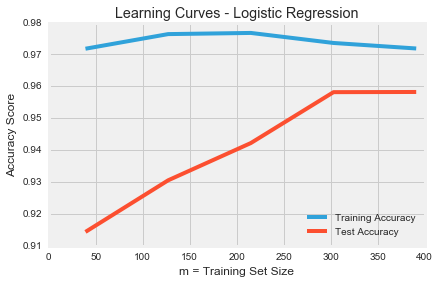

In [693]:
# plot the learning curve for logistic model
plt.plot(m,train_cv_err, label = 'Training Accuracy')
plt.plot(m,test_cv_err, label = 'Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('m = Training Set Size')
plt.legend(loc='lower right');
plt.title('Learning Curves - Logistic Regression');

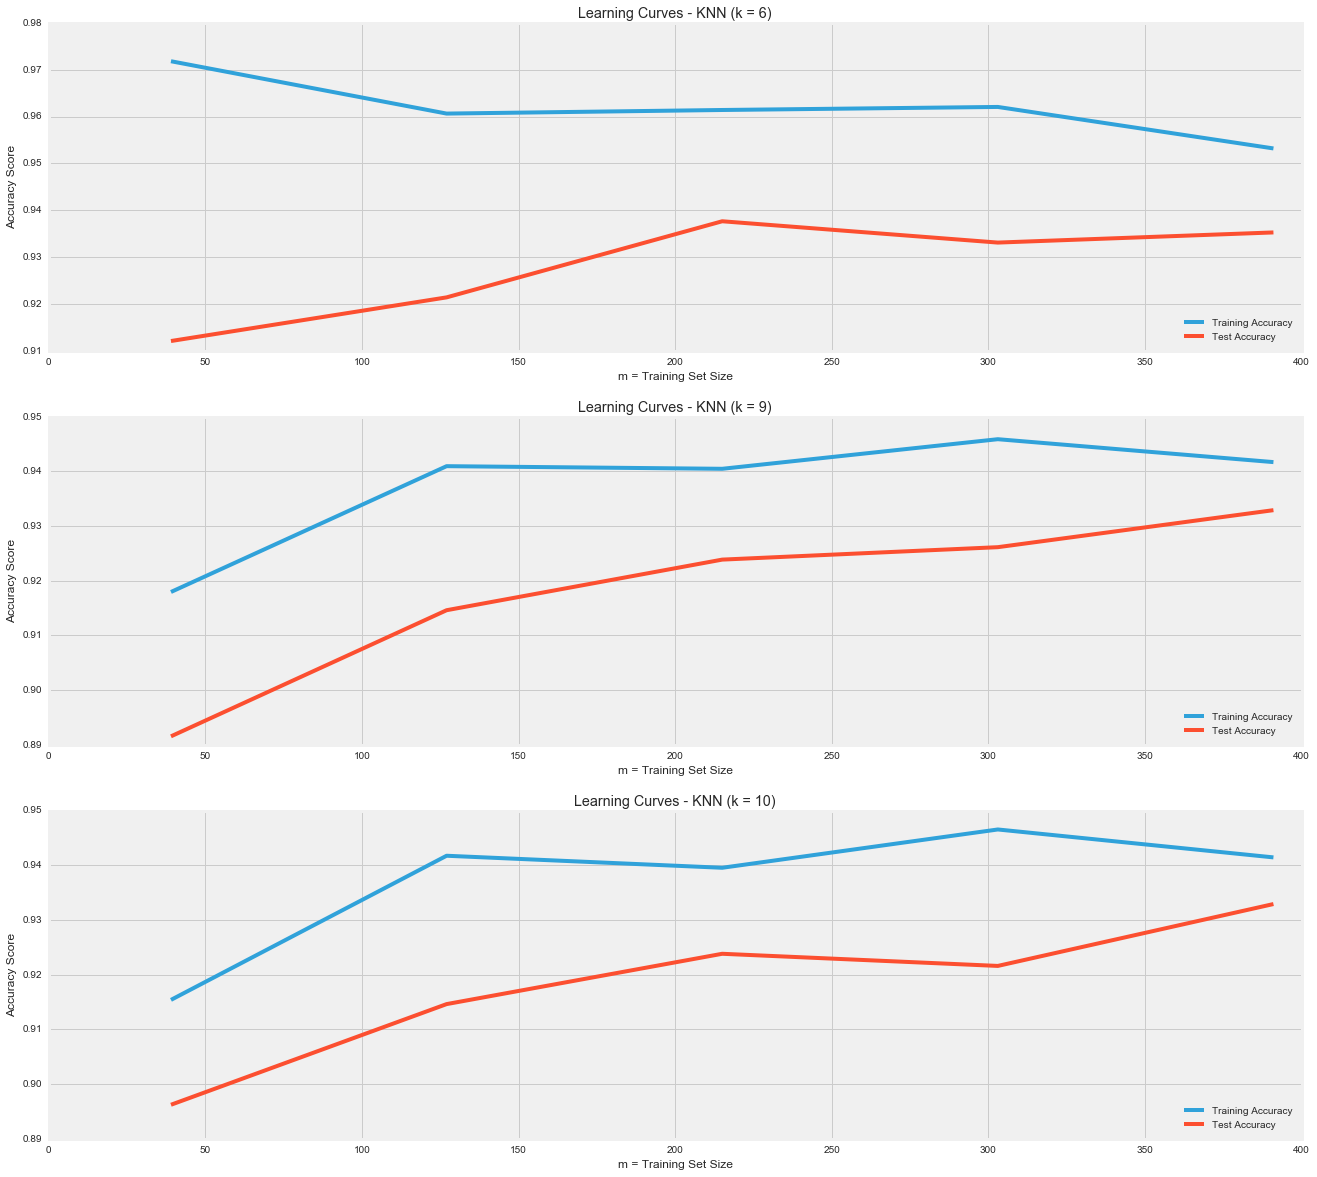

In [694]:
fig, ax = plt.subplots(3, 1, figsize = (20, 20))

# KNN models

# k = 6
m,train_err6,test_err6 = learning_curve(KNeighborsClassifier(n_neighbors=6),
                                        X, y, cv = 10)
train_cv_err6 = np.mean(train_err6, axis = 1)
test_cv_err6 = np.mean(test_err6, axis = 1)

ax[0].plot(m,train_cv_err6, label = 'Training Accuracy')
ax[0].plot(m,test_cv_err6, label = 'Test Accuracy')
ax[0].set_ylabel('Accuracy Score')
ax[0].set_xlabel('m = Training Set Size')
ax[0].legend(loc='lower right');
ax[0].set_title('Learning Curves - KNN (k = 6)');

# k = 9
m,train_err9,test_err9 = learning_curve(KNeighborsClassifier(n_neighbors=9),
                                        X, y, cv = 10)
train_cv_err9 = np.mean(train_err9, axis = 1)
test_cv_err9 = np.mean(test_err9, axis = 1)

ax[1].plot(m,train_cv_err9, label = 'Training Accuracy')
ax[1].plot(m,test_cv_err9, label = 'Test Accuracy')
ax[1].set_ylabel('Accuracy Score')
ax[1].set_xlabel('m = Training Set Size')
ax[1].legend(loc='lower right');
ax[1].set_title('Learning Curves - KNN (k = 9)');

# k = 10
m,train_err10,test_err10 = learning_curve(KNeighborsClassifier(n_neighbors=10),
                                        X, y, cv = 10)
train_cv_err10 = np.mean(train_err10, axis = 1)
test_cv_err10 = np.mean(test_err10, axis = 1)

ax[2].plot(m,train_cv_err10, label = 'Training Accuracy')
ax[2].plot(m,test_cv_err10, label = 'Test Accuracy')
ax[2].set_ylabel('Accuracy Score')
ax[2].set_xlabel('m = Training Set Size')
ax[2].legend(loc='lower right');
ax[2].set_title('Learning Curves - KNN (k = 10)');

#### Exercise 5.8

This is a preview of many other classification algorithms that we will go over.  

`sklearn` has the same interface for all of thse, so you can use them exactly the same way as you did `LogisticRegression` and `KNeighborsClassifier`. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

`from sklearn.naive_bayes import GaussianNB`

SVM (Support Vector Machine) Classifier

`from sklearn.svm import SVC`
    
Decision Tree

`from sklearn.tree import DecisionTreeClassifier`
    
Random Forest

`from sklearn.ensemble import RandomForestClassifier`
    

In [695]:
from sklearn.naive_bayes import GaussianNB
gnbmodel = GaussianNB()
gnbfit = gnbmodel.fit(X_train, y_train)
y_pred_gnb = gnbfit.predict(X_test)
print('Gaussian NB:', accuracy_score(y_test, y_pred_gnb))

Gaussian NB: 0.93893129771


In [696]:
from sklearn.svm import SVC
svcmodel = SVC()
svcfit = svcmodel.fit(X_train, y_train)
y_pred_svc = svcfit.predict(X_test)
print('SVC:', accuracy_score(y_test, y_pred_svc))

SVC: 0.954198473282


In [697]:
from sklearn.tree import DecisionTreeClassifier
dtcmodel = DecisionTreeClassifier()
dtcfit = dtcmodel.fit(X_train, y_train)
y_pred_dtc = dtcfit.predict(X_test)
print('DTC:', accuracy_score(y_test, y_pred_dtc))

DTC: 0.93893129771


In [698]:
from sklearn.ensemble import RandomForestClassifier
rfcmodel = RandomForestClassifier()
rfcfit = rfcmodel.fit(X_train, y_train)
y_pred_rfc = rfcfit.predict(X_test)
print('RFC:', accuracy_score(y_test, y_pred_rfc))

RFC: 0.984732824427


#### Exercise 5.9  

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

`from sklearn.cross_validation import cross_val_score`

Just like the `learning_curve` function, this takes a classifier object, `X` and `y`, returns accuracy (or whatever score you prefer by using `scoring` keyword argument).  Of course, it will return a score for each cross validation fold, so to get the generalised accuracy, you need to take the mean of what it returns.  

Use this function to calculate the cross validation scores of each of the classifiers you tried before.

In [699]:
from sklearn.cross_validation import cross_val_score

In [700]:
# KNN Models (k = 6, 9, 10)
knn6score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=6),
                                  X, y, cv = 10))
knn9score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=9),
                                  X, y, cv = 10))
knn10score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=10),
                                  X, y, cv = 10))

print('KNN (k = 6): ', knn6score) # best score
print('KNN (k = 9): ', knn9score)
print('KNN (k = 10): ', knn10score)

KNN (k = 6):  0.935283902144
KNN (k = 9):  0.932902949763
KNN (k = 10):  0.932902949763


In [701]:
# Logistic Regression
lrscore = np.mean(cross_val_score(LogisticRegression(),
                                 X, y, cv = 10))
print('Logistic: ', lrscore)

Logistic:  0.958227625088


In [702]:
# Gaussian Naive Bayes
gnbscore = np.mean(cross_val_score(GaussianNB(),
                                  X, y, cv = 10))
print('Gaussian NB: ', gnbscore)

Gaussian NB:  0.939773985704


In [703]:
# Support Vector Machine/Classifier
svcscore = np.mean(cross_val_score(SVC(),
                                  X, y, cv = 10))
print('SVC: ', svcscore)

SVC:  0.958280479211


In [704]:
# Decision Tree Classifier
dtcscore = np.mean(cross_val_score(DecisionTreeClassifier(),
                                  X, y, cv = 10))
print('DTC: ', dtcscore)

DTC:  0.932907983489


In [705]:
# Random Forest Classifier
rfcscore = np.mean(cross_val_score(RandomForestClassifier(),
                                  X, y, cv = 10))
print('RFC: ', rfcscore)

RFC:  0.958335850196


In [706]:
classifiers = ['knn6', 'knn9', 'knn10',
              'logistic', 'gaussian naive bayes', 'svm',
              'decision tree', 'random forest']
CVscores = [knn6score, knn9score, knn10score,
           lrscore, gnbscore, svcscore,
           dtcscore, rfcscore]

In [707]:
for idx, score in enumerate(CVscores):
    if score == max(CVscores):
        print(classifiers[idx], score)

random forest 0.958335850196


Of all the different classifiers for the vote data, SVM performs the best in terms of accuracy (0.958).

#### Exercise 5.10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?  

Reload the data from scratch. Convert y --> 1, n --> 0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.  

Convert each '?' to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).  

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [708]:
votedf = pd.read_csv(datalink, header=None, na_values = "?")
votedf = votedf.iloc[:,1:]
votedf.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [709]:
# recode values (y = 1, n = 0), row-wise
votedf[votedf == 'y'] = 1
votedf[votedf == 'n'] = 0
votedf.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [710]:
# for mode, must add .iloc[0] to get col-wise mode
votedf.mode().iloc[0]

1     0
2     1
3     1
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    1
15    0
16    1
Name: 0, dtype: int64

In [711]:
votedf.fillna(votedf.mode().iloc[0], inplace = True).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [712]:
headers = ['handicapped-infants',
           'water-project-cost-sharing',
           'adoption-of-the-budget-resolution',
           'physician-fee-freeze',
           'el-salvador-aid',
           'religious-groups-in-schools',
           'anti-satellite-test-ban',
           'aid-to-nicaraguan-contras',
           'mx-missile',
           'immigration',
           'synfuels-corporation-cutback',
           'education-spending',
           'superfund-right-to-sue',
           'crime',
           'duty-free-exports',
           'export-administration-act-south-africa']
headers = [header.replace('-','_') for header in headers]
votedf.columns = headers

In [713]:
votedf.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [714]:
# predict vote on immigration
y = votedf['immigration']
X = votedf.drop(['immigration'], axis = 1)

In [715]:
# Logistic Regression
lrscore = np.mean(cross_val_score(LogisticRegression(),
                                 X, y, cv = 10))
print('Logistic: ', lrscore)

Logistic:  0.496047686164


In [716]:
# KNN (k = 6)
knn6score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=6),
                                  X, y, cv = 10))
print('KNN (k = 6): ', knn6score)

KNN (k = 6):  0.533410852713


The cross-validation accuracy is quite low for both when predicting the vote on immigration based on the votes on other issues.  

For the logistic model, the accuracy is 0.496, whilst for KNN (k = 6), the accuracy is slightly higher (0.53).

#### Exercise 5.11  

Back to movies data. Choose one categorical feature to predict.

Make a bar graph of how many of each movie there is in the data. For example, with ratings, show how many G, PG, PG-13, R movies there are (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [717]:
moviedf = pd.read_csv('data/2013_movies.csv')
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [718]:
# drop nulls
moviedf.dropna(inplace = True)
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ KB


In [719]:
moviedf.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [720]:
cols = ['Rating', 'Runtime', 'DomesticTotalGross', 'Budget']
moviedf = moviedf[cols]

In [721]:
moviedf.head()

,Rating,Runtime,DomesticTotalGross,Budget
0,PG-13,146,424668047,130000000.0
1,PG-13,129,409013994,200000000.0
2,PG,108,400738009,150000000.0
3,PG,98,368061265,76000000.0
4,PG-13,143,291045518,225000000.0


In [722]:
y = moviedf['Rating']
X = moviedf.iloc[:,1:]

In [723]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 3 columns):
Runtime               87 non-null int64
DomesticTotalGross    87 non-null int64
Budget                87 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.7 KB


In [724]:
# plot ratings
y.value_counts()

PG-13    40
R        33
PG       14
Name: Rating, dtype: int64

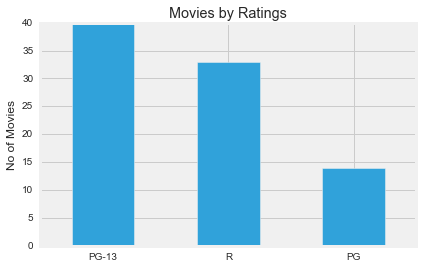

In [725]:
y.value_counts().plot(kind = 'bar', rot = 0)
plt.title('Movies by Ratings')
plt.ylabel('No of Movies')

In [726]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 4444)

In [727]:
# Find best k for KNN
# construct list of accuracy scores for every model
# i.e. model with k = 1 .... model with k = 20
k_vals = list(range(1, 21))
scores = []
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    fit = model.fit(X_train, y_train)
    y_pred_vals = fit.predict(X_test)
    score = accuracy_score(y_test, y_pred_vals)
    scores.append(score)

In [728]:
# retrieve k-value for max scores
for idx, score in enumerate(scores):
    k = idx+1 
    if score == max(scores):
        print(k, score)

4 0.555555555556
5 0.555555555556


In [729]:
# KNN (k = 4) train/test split
knnmodel = KNeighborsClassifier(n_neighbors=4)
knnfit = knnmodel.fit(X_train, y_train)
y_pred_knn = knnfit.predict(X_test)
print('KNN accuracy (k = 4): ', accuracy_score(y_test, y_pred_knn))

KNN accuracy (k = 4):  0.555555555556


In [730]:
# KNN (k = 4) CV
knn4score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=4),
                                  X, y, cv = 10))
print('KNN (k = 4): ', knn4score)

KNN (k = 4):  0.438333333333


In [731]:
# Logistic Regression
lrmod = LogisticRegression()
lrfit = lrmod.fit(X_train, y_train)
y_pred_lr = lrfit.predict(X_test)
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred_lr))

Logistic Regression accuracy:  0.444444444444


In [732]:
# Logistic Regression CV
lrscore = np.mean(cross_val_score(LogisticRegression(),
                                 X, y, cv = 10))
print('Logistic: ', lrscore)

Logistic:  0.531944444444


In [733]:
# Logistic Regression Coefficients
list(zip(X.columns, lrfit.coef_[0]))

[('Runtime', -1.7596553566025919e-13),
 ('DomesticTotalGross', -1.9389762288332889e-09),
 ('Budget', -1.4612437894804001e-08)]

In [734]:
# (Stupid) Baseline Predictor
# functions that always return 'democrat' or 'republican'
def predict_common(X):
    return [y[y.value_counts().max()] for _ in range(len(X))]

In [735]:
# test function
set(predict_common(X))

{'PG-13'}

In [736]:
# Stupid Baseline train/test split
y_pred_common = predict_common(X_test)
common_score = accuracy_score(y_test, y_pred_common)
print('All PG-13 Predictions: ', common_score)

All PG-13 Predictions:  0.407407407407


KNN (k = 4) seems to do the best, followed by logistic regression. Both do better than the `All PG-13 Predictions` baseline model.

In terms of coefficients for the logistic regression model, they are all quite small, so it's hard to say how important any of the predictors are, especially given the accuracy of the model.

#### Exercise 5.12  

Data: Haberman Survival Dataset

In [737]:
datalink = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [738]:
df = pd.read_csv(datalink, header = None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Attributes:
- 'age' = age of patient at time of operation  
- 'year' = year of operation  
- 'nodes' = number of positive axillary nodes detected  
- 'survival' = (1 if patient survived 5 or more years, 2 if died within 5 years)

In [739]:
headers = ['age','year','nodes','survival']
df.columns = headers
df.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


What is the average and std dev of the age of all patients?

In [740]:
print('average age of all patients: ', df.age.mean())
print('std dev of age of all patients: ', df.age.std())

average age of all patients:  52.45751633986928
std dev of age of all patients:  10.80345234930328


What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [741]:
print('mean age of long-term survivors (>= 5 years): ', 
      df[df.survival == 1].age.mean())
print('std dev of age of long-term survivors (>= 5 years): ', 
      df[df.survival == 1].age.std())

mean age of long-term survivors (>= 5 years):  52.01777777777778
std dev of age of long-term survivors (>= 5 years):  11.012154179929546


What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [742]:
print('mean age of short-term survivors (< 5 years): ', 
      df[df.survival == 2].age.mean())
print('std dev of age of short-term survivors (< 5 years): ', 
      df[df.survival == 2].age.std())

mean age of short-term survivors (< 5 years):  53.67901234567901
std dev of age of short-term survivors (< 5 years):  10.16713720829741


Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

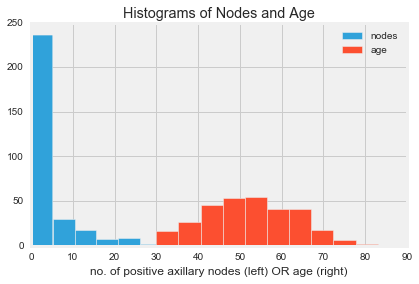

In [743]:
plt.hist(df['nodes'], label = 'nodes')
plt.hist(df['age'], label = 'age')
plt.xlabel('no. of positive axillary nodes (left) OR age (right)')
plt.title('Histograms of Nodes and Age')
plt.legend(loc = 'upper right');

What is the earliest year of surgery in this dataset?

In [744]:
print('Earliest year of surgery: ', '19'+str(df.year.min()))

Earliest year of surgery:  1958


What is the most recent year of surgery?

In [745]:
print('Most recent year of surgery: ', '19'+str(df.year.max()))

Most recent year of surgery:  1969


Use logistic regression to predict survival after 5 years. How well does your model do?

In [746]:
df.head()
y = df['survival']
X = df.drop('survival', axis = 1)

In [747]:
# recode y = 1 (>= 5 yr survival), 0 (otherwise)
y[y == 2] = 0

In [748]:
y.value_counts()

1    225
0     81
Name: survival, dtype: int64

In [749]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 4444)

In [750]:
# fit logistic model
lr = LogisticRegression()
lrfit = lr.fit(X_train, y_train)

In [751]:
# logistic model accuracy
y_pred = lrfit.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.815217391304


In [752]:
# Logistic Regression CV
lrscore = np.mean(cross_val_score(LogisticRegression(),
                                 X, y, cv = 10))
print('Logistic: ', lrscore)

Logistic:  0.751659946237


In [753]:
confusion_matrix(y_test, y_pred)

array([[ 1, 17],
       [ 0, 74]])

In [754]:
# Logistic Regression Coefficients
list(zip(X.columns, lrfit.coef_[0]))

[('age', -0.015551502481860675),
 ('year', 0.028992790586260746),
 ('nodes', -0.071361965504665142)]

The number of nodes, as well as age have a negative relationship with survival, which means that older patients and those with more nodes are less likely to survive more than five years after surgery.

Draw the learning curve for logistic regression in this case.

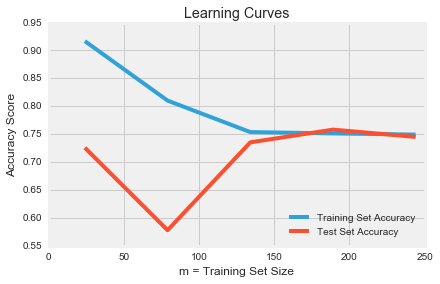

In [755]:
m, train_err, test_err = learning_curve(LogisticRegression(), X, y, cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.ylabel('Accuracy Score')
plt.xlabel('m = Training Set Size')
plt.legend(['Training Set Accuracy','Test Set Accuracy'],
           loc='lower right')
plt.title('Learning Curves');